### 3-1 Implied Voliatility

### 3-2 Monte Carlo Simulation

In [24]:
from bsm_functions import bsm_call_value

In [25]:
s0 = 100
k = 105
T = 1.0
r = 0.05
sig = 0.2

In [26]:
c = bsm_call_value(s0,k,T,r,sig)
print(c) #BSM 공식을 사용한 옵션 가치

8.021352235143176


In [27]:
#파이썬 순수함수로 구현_몬테카를로
#조건 제시법 기능 사용

from time import time
from math import log, exp, sqrt
from random import gauss, seed

seed(20000)
t0 = time()

s0 = 100.
k = 105.
T = 1.0
r = 0.05
sig = 0.2
m = 50
dt = T/m
I =250000 # 샘플 경로의 수

#경로 하나당 M개의 시간 구간을 가지는 I개의 샘플 경로 생성

s = []

for i in range(I): 
    path = []
    for t in range(m+1): #주가 예측하는 함수
        if t == 0 :
            path.append(s0)
        else :
            z = gauss(0.0,1.0)
            st = path[t-1]*exp((r-0.5*sig**2)*dt+sig*sqrt(dt)*z)
            path.append(st)
    s.append(path)
    
C0 = exp(-r*T)*sum([max(path[-1]-k,0) for path in s])/I

tpy = time()-t0
print('european option value %7.3f'%C0)
print('duration in seconds %7.3f'%tpy)

european option value   7.999
duration in seconds  21.512


In [28]:
#numpy를 이용한 vector화
import math
import numpy as np
from time import time

np.random.seed(20000)
t0 = time()

s0 = 100.
k = 105.
T = 1.0
r = 0.05
sig = 0.2
m = 50
dt = T/m
I =250000 # 샘플 경로의 수

s = np.zeros((m+1,I)) #st, simulation 개수, m개의 시간구간을 가지기 위해
s[0] = s0

for t in range(1,m+1):
    z = np.random.standard_normal(I)
    s[t] = s[t-1]*np.exp((r-0.5*sig**2)*dt+sig*math.sqrt(dt)*z)

c0 = exp(-r*T)*np.sum(np.maximum(s[-1]-k,0))/I

tnp1 = time()-t0
print('european option value %7.3f'%c0)
print('duration in seconds %7.3f'%tnp1)

european option value   8.037
duration in seconds   0.991


In [23]:
round(tpy/tnp1,2) #numpy 사용이 약 30배 빠름

21.87

Text(0, 0.5, 'index level')

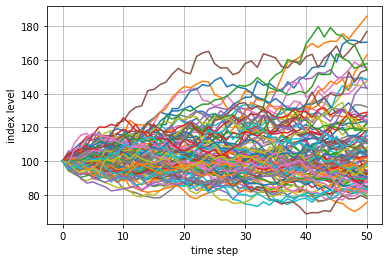

In [29]:
import matplotlib.pyplot as plt
plt.plot(s[:,:100])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')

In [5]:
#주가 구하는 방식이 로그-오일러 이산화를 적용
# from 함수 import * (* 가 모든 것을 의미하므로, 함수를 붙이지 않고 사용가능. ex np.exp -> exp)

from numpy import *
from time import time

random.rand(20000)
t0 = time()

s0 = 100.
k = 105.
T = 1.0
r = 0.05
sig = 0.2
m = 50
dt = T/m
I =25000 # 샘플 경로의 수

s = s0*exp(cumsum((r-0.5*sig**2)*dt+sig*sqrt(dt)*random.standard_normal((m+1,I)),axis = 0))

s[0] = s0

c0 = math.exp(-r*T)*sum(maximum(s[-1]-k,0))/I

tnp2 =time()-t0
print('european option value by log-eulor %7.3f'%c0)
print('duration in seconds %7.3f'%tnp2)
#? log-euler scheme인데 왜 exp 사용되는지../.???

european option value by log-eulor   8.154
duration in seconds   0.135


Text(0, 0.5, 'frequency')

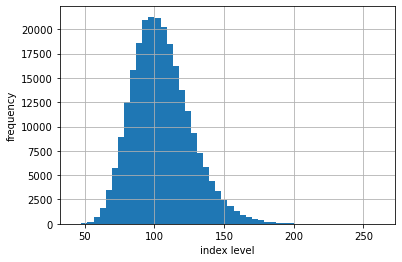

In [35]:
plt.hist(s[-1],bins = 50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')
# 만기 주가가 대략적으로 로그정규분포를 보여줌.

(0.0, 50000.0)

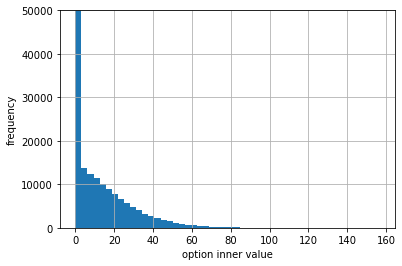

In [81]:
#만기 옵션의 pay-off값  -> 유러피안 콜옵션은 만기 시 내재가치 대부분 0 따라서 만기시 아무런 가치 없다는 것 표현
plt.hist(np.maximum(s[-1]-k,0),bins = 50) #bins = 막대 개수
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0,50000)

In [51]:
sum(s[-1]<k)



133958

### 3-3 기술적 분석